In [125]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go # visualization


In [126]:
#data importing
df= pd.read_csv('Churn.csv')

In [127]:
df.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  day.charge  \
0        no       10.0           3         2.70  ...        110       45.07   
1        no       13.7           3         3.70  ...        123       27.47   
2        no       12.2           5         3.29  ...        114       41.38   
3       yes        6.6           7         1.78  ...         71        50.9   
4       yes       10.1           3         2.73  ...        113       28.34   

  eve.mins eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4        99       16.78       244.7           91         11.01   
1    195.5       103       16.62       254.4          103         11.45   
2    121.2       110       10.30       162.6          104          7.32   
3     61.9        88        5.26       196.9           89          8.86   
4    148.3       122       12.61       186.9          121          8.41   

   customer.calls  churn  
0               1     no  
1               1     no  
2               0     no  
3               2     no  
4               3     no  

[5 rows x 21 columns]

In [128]:
df=df.drop(columns=['Unnamed: 0'])

In [129]:
df.head()

state      area.code  account.length voice.plan  voice.messages intl.plan  \
0    KS  area_code_415             128        yes              25        no   
1    OH  area_code_415             107        yes              26        no   
2    NJ  area_code_415             137         no               0        no   
3    OH  area_code_408              84         no               0       yes   
4    OK  area_code_415              75         no               0       yes   

   intl.mins  intl.calls  intl.charge  day.mins  day.calls day.charge  \
0       10.0           3         2.70     265.1        110      45.07   
1       13.7           3         3.70     161.6        123      27.47   
2       12.2           5         3.29     243.4        114      41.38   
3        6.6           7         1.78     299.4         71       50.9   
4       10.1           3         2.73     166.7        113      28.34   

  eve.mins  eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4         99       16.78       244.7           91         11.01   
1    195.5        103       16.62       254.4          103         11.45   
2    121.2        110       10.30       162.6          104          7.32   
3     61.9         88        5.26       196.9           89          8.86   
4    148.3        122       12.61       186.9          121          8.41   

   customer.calls churn  
0               1    no  
1               1    no  
2               0    no  
3               2    no  
4               3    no

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [59]:
df.isnull().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

# EDA AND DATA PREPROCESSING

In [60]:
df.shape

(5000, 20)

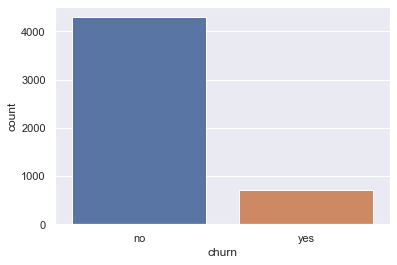

In [61]:
sns.countplot(x="churn",data=df);

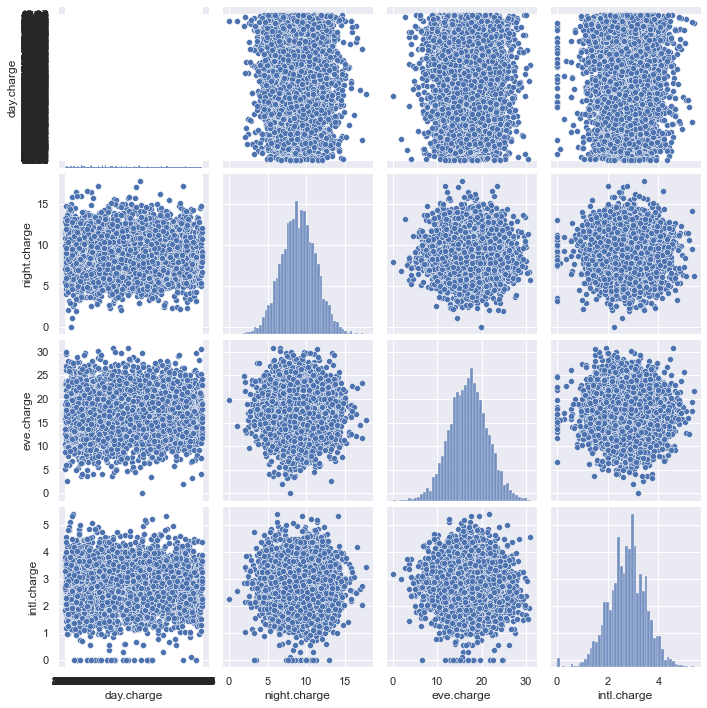

In [62]:
sns.pairplot(df,vars = ['day.charge','night.charge','eve.charge','intl.charge'])

no     4293
yes     707
Name: churn, dtype: int64


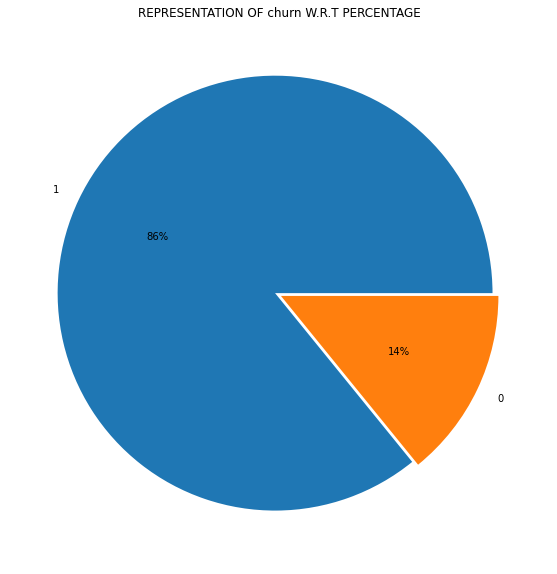

In [11]:
print(df['churn'].value_counts())
plt.figure(figsize=(10,10))
plt.pie(x = df['churn'].value_counts(),labels=[1,0],autopct='%1.0f%%', labeldistance=1.1,explode=[0.02,0.01],shadow=False)
plt.title("REPRESENTATION OF churn W.R.T PERCENTAGE")
plt.show()

<AxesSubplot:xlabel='day.charge', ylabel='night.charge'>

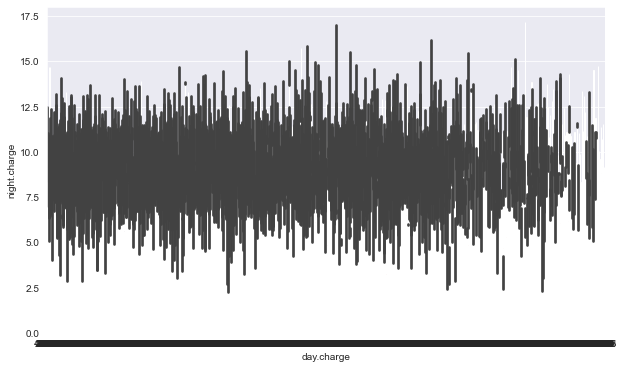

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='day.charge',y='night.charge',data=df,palette='rocket')

<AxesSubplot:xlabel='churn', ylabel='count'>

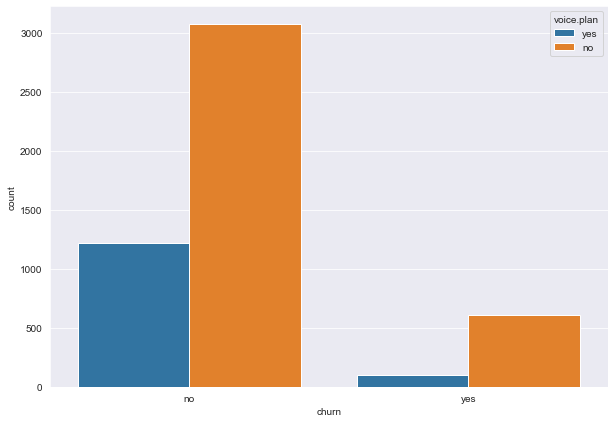

In [13]:
plt.figure(figsize= (10,7))
sns.countplot(x = 'churn', hue = 'voice.plan', data = df)

<AxesSubplot:xlabel='churn', ylabel='count'>

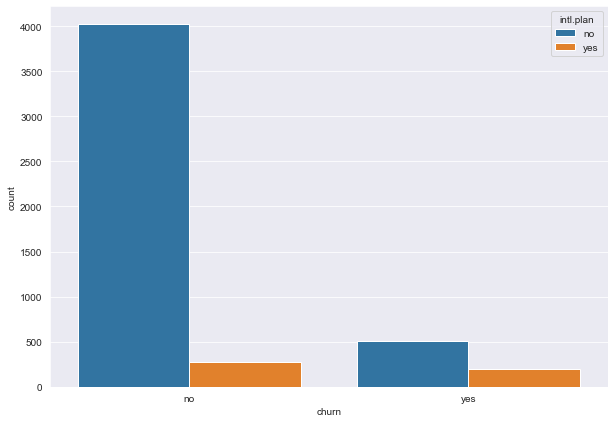

In [14]:
plt.figure(figsize= (10,7))
sns.countplot(x = 'churn', hue = 'intl.plan', data = df)

In [15]:
df['churn'].value_counts()

no     4293
yes     707
Name: churn, dtype: int64

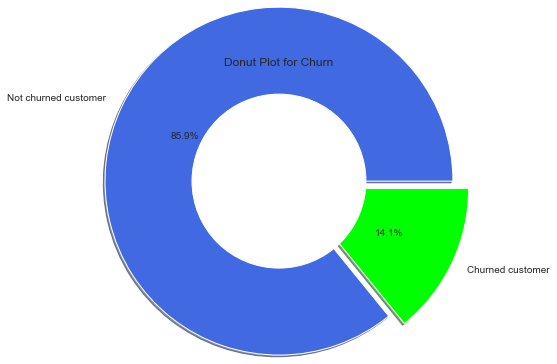

In [16]:
df= df['churn'].value_counts()
explode = (0, 0.2)
plt.pie(df, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Not churned customer','Churned customer'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

In [20]:
df['state'].nunique()

51

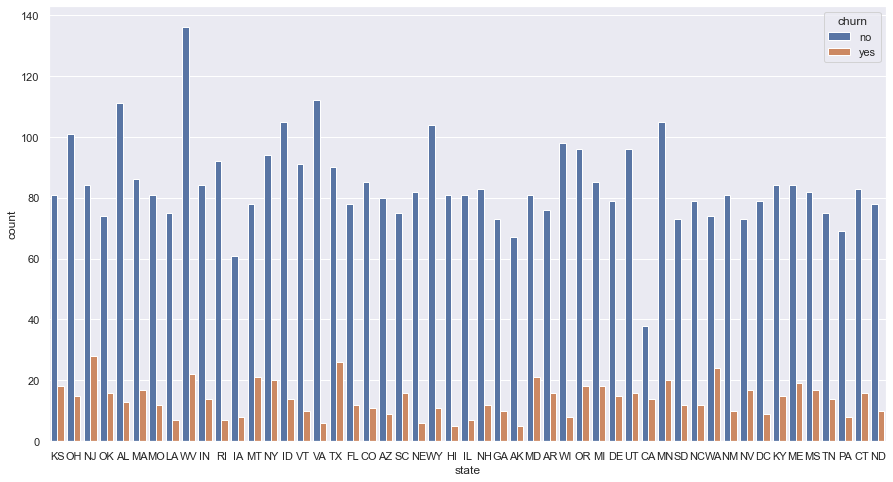

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(x='state', hue="churn", data=df)
plt.show()

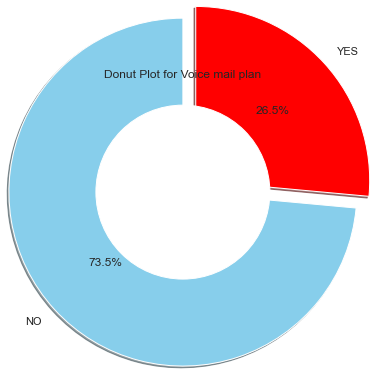

In [22]:
data = df['voice.plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Voice mail plan')
plt.show()

In [23]:
df.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  day.charge  \
0        no       10.0           3         2.70  ...        110       45.07   
1        no       13.7           3         3.70  ...        123       27.47   
2        no       12.2           5         3.29  ...        114       41.38   
3       yes        6.6           7         1.78  ...         71        50.9   
4       yes       10.1           3         2.73  ...        113       28.34   

  eve.mins eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4        99       16.78       244.7           91         11.01   
1    195.5       103       16.62       254.4          103         11.45   
2    121.2       110       10.30       162.6          104          7.32   
3     61.9        88        5.26       196.9           89          8.86   
4    148.3       122       12.61       186.9          121          8.41   

   customer.calls  churn  
0               1     no  
1               1     no  
2               0     no  
3               2     no  
4               3     no  

[5 rows x 21 columns]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='voice.messages', ylabel='Density'>

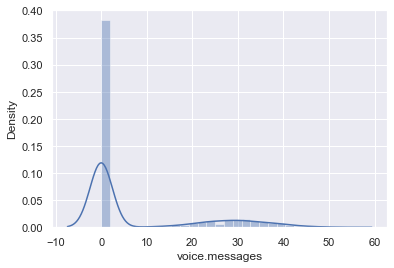

In [24]:
sns.distplot(df['voice.messages'])

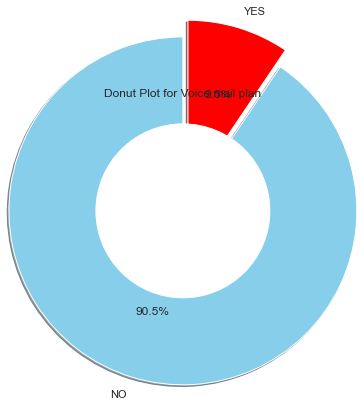

In [25]:
data = df['intl.plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Voice mail plan')
plt.show()

<Figure size 1440x1080 with 0 Axes>

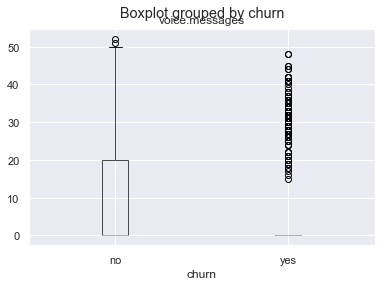

In [26]:
#Analysing by using boxplot diagram between 'number vmail messages' and 'churn'
fig = plt.figure(figsize =(20,15)) 
df.boxplot(column='voice.messages', by='churn')
fig.suptitle('Number vmail message', fontsize=14, fontweight='bold')
plt.show()

<AxesSubplot:xlabel='day.mins', ylabel='day.charge'>

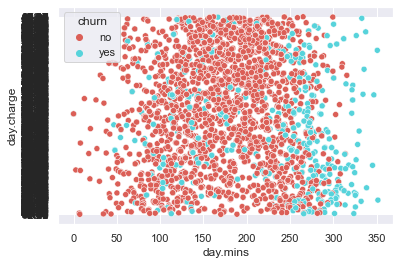

In [27]:

sns.scatterplot(x="day.mins", y="day.charge", hue="churn", data=df,palette='hls')

<AxesSubplot:xlabel='eve.mins', ylabel='eve.charge'>

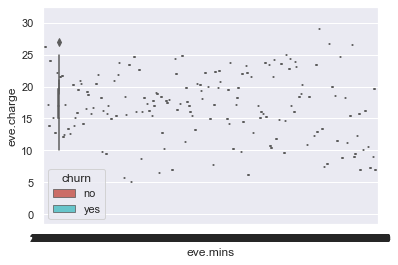

In [28]:

sns.boxplot(x="eve.mins", y="eve.charge", hue="churn", data=df,palette='hls')

<AxesSubplot:xlabel='night.calls', ylabel='night.charge'>

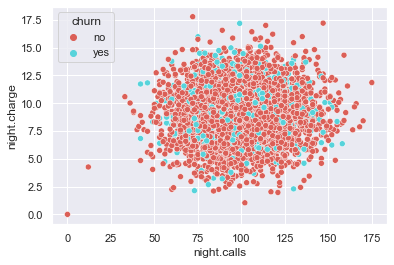

In [29]:

sns.scatterplot(x="night.calls", y="night.charge", hue="churn", data=df,palette='hls')

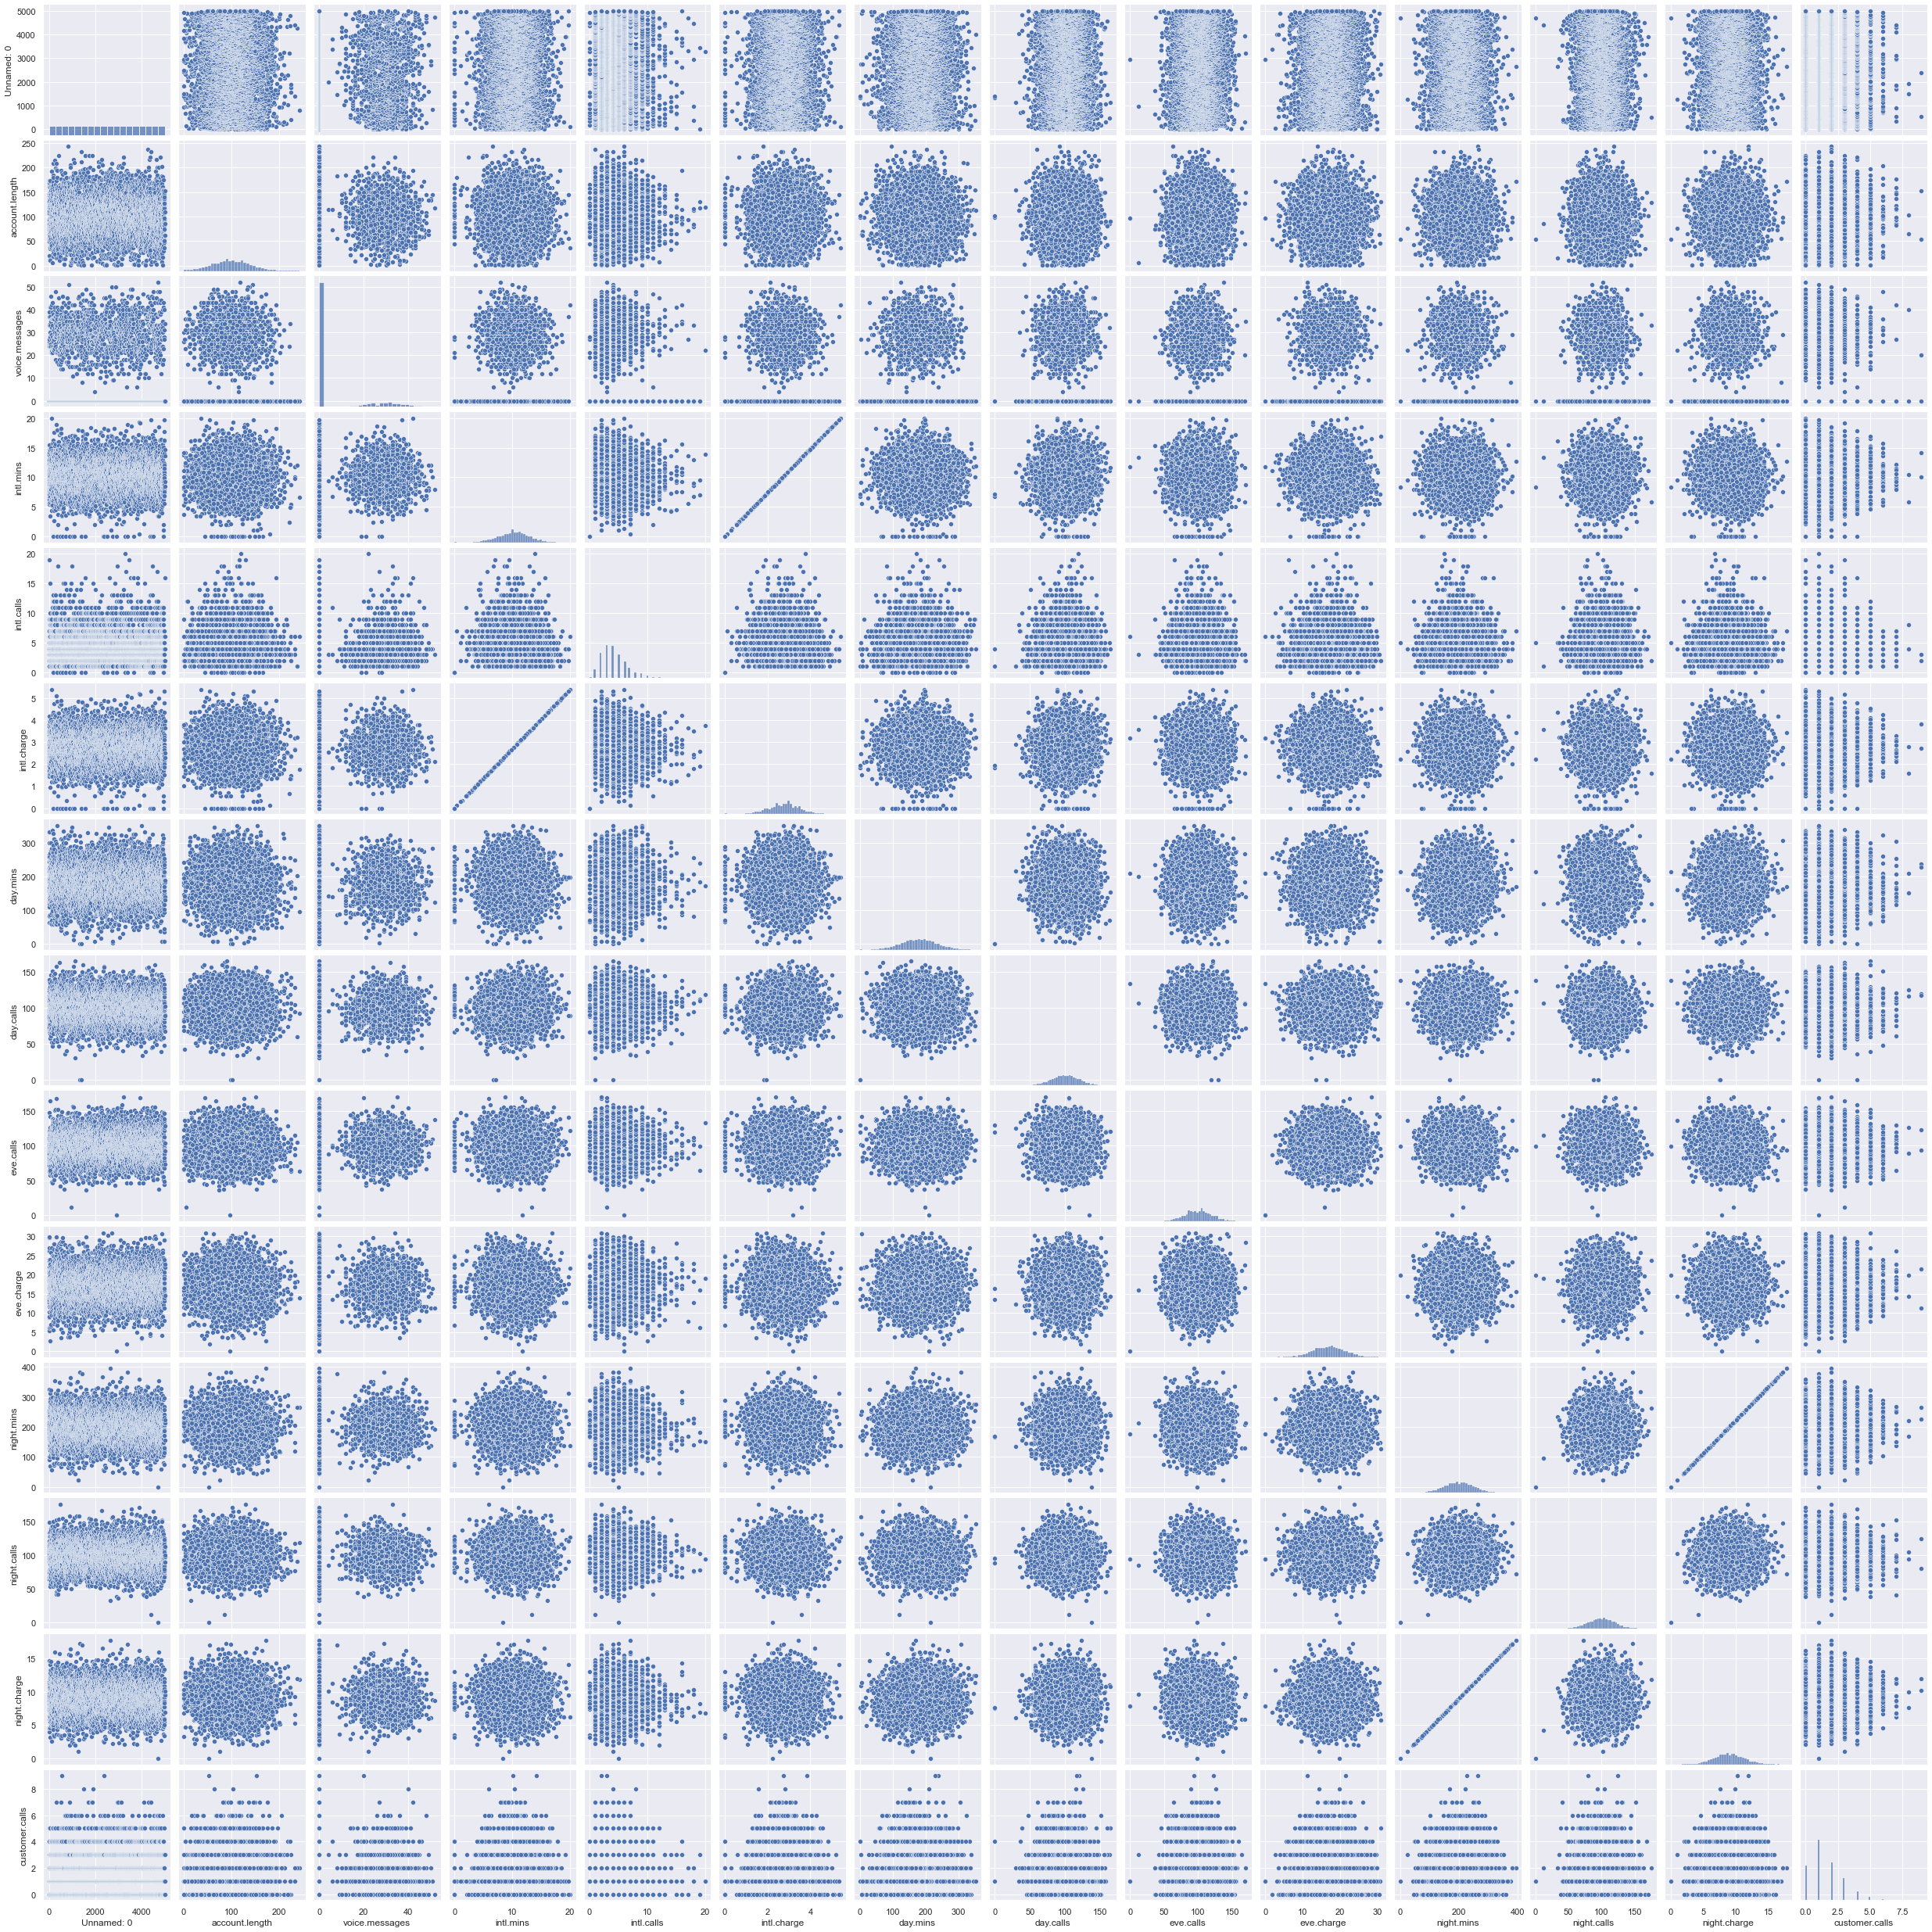

In [31]:
sns.pairplot(df)

# CHECKING CORRELATION

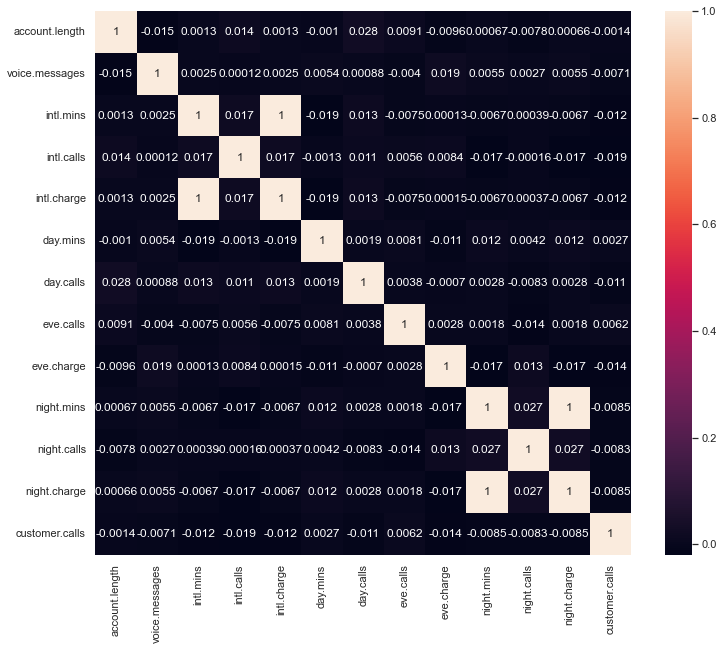

In [36]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

# CONVERTING STRING VALUE INTO NUMERIC VALUES 

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [80]:
df["state"]= le.fit_transform(df["state"])
df["voice.plan"]= le.fit_transform(df["voice.plan"])
df["intl.plan"]= le.fit_transform(df["intl.plan"])
df["churn"]= le.fit_transform(df["churn"])

In [131]:
df['area.code']=df['area.code'].apply(lambda x :x.split('_'))

In [98]:
df['area.code']

0       [area, code, 415]
1       [area, code, 415]
2       [area, code, 415]
3       [area, code, 408]
4       [area, code, 415]
              ...        
4995    [area, code, 408]
4996    [area, code, 415]
4997    [area, code, 415]
4998    [area, code, 510]
4999    [area, code, 415]
Name: area.code, Length: 5000, dtype: object

In [100]:
df['area.code']=df['area.code'].apply(lambda x:x[2])

In [101]:
df['area.code']

0       415
1       415
2       415
3       408
4       415
       ... 
4995    408
4996    415
4997    415
4998    510
4999    415
Name: area.code, Length: 5000, dtype: object

In [102]:
df.head()

state area.code  account.length  voice.plan  voice.messages  intl.plan  \
0     16       415             128           1              25          0   
1     35       415             107           1              26          0   
2     31       415             137           0               0          0   
3     35       408              84           0               0          1   
4     36       415              75           0               0          1   

   intl.mins  intl.calls  intl.charge  day.mins  day.calls day.charge  \
0       10.0           3         2.70     265.1        110      45.07   
1       13.7           3         3.70     161.6        123      27.47   
2       12.2           5         3.29     243.4        114      41.38   
3        6.6           7         1.78     299.4         71       50.9   
4       10.1           3         2.73     166.7        113      28.34   

  eve.mins  eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4         99       16.78       244.7           91         11.01   
1    195.5        103       16.62       254.4          103         11.45   
2    121.2        110       10.30       162.6          104          7.32   
3     61.9         88        5.26       196.9           89          8.86   
4    148.3        122       12.61       186.9          121          8.41   

   customer.calls  churn  
0               1      0  
1               1      0  
2               0      0  
3               2      0  
4               3      0

In [103]:
df['area.code'].unique()

array(['415', '408', '510'], dtype=object)

# CHECKING COLINEARITY IN DATA AND REMOMING COLUMNS USING BELOW FUNCTION . AFTER CHECKING MULTICOLIENIRITY

In [104]:
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [112]:
corr_features = correlation(df, 0.95)
len(set(corr_features))

3

In [113]:
corr_features

{'intl.charge', 'night.charge', 'voice.messages'}

In [117]:
df.drop(corr_features,axis=1)

state area.code  account.length  voice.plan  intl.plan  intl.mins  \
0        16       415             128           1          0       10.0   
1        35       415             107           1          0       13.7   
2        31       415             137           0          0       12.2   
3        35       408              84           0          1        6.6   
4        36       415              75           0          1       10.1   
...     ...       ...             ...         ...        ...        ...   
4995     11       408              50           1          0        9.9   
4996     49       415             152           0          0       14.7   
4997      7       415              61           0          0       13.6   
4998      7       510             109           0          0        8.5   
4999     46       415              86           1          0        9.3   

      intl.calls  day.mins  day.calls day.charge eve.mins  eve.calls  \
0              3     265.1        110      45.07    197.4         99   
1              3     161.6        123      27.47    195.5        103   
2              5     243.4        114      41.38    121.2        110   
3              7     299.4         71       50.9     61.9         88   
4              3     166.7        113      28.34    148.3        122   
...          ...       ...        ...        ...      ...        ...   
4995           5     235.7        127      40.07      223        126   
4996           2     184.2         90      31.31    256.8         73   
4997           4     140.6         89       23.9    172.8        128   
4998           6     188.8         67       32.1    171.7         92   
4999          16     129.4        102         22    267.1        104   

      eve.charge  night.mins  night.calls  customer.calls  churn  
0          16.78       244.7           91               1      0  
1          16.62       254.4          103               1      0  
2          10.30       162.6          104               0      0  
3           5.26       196.9           89               2      0  
4          12.61       186.9          121               3      0  
...          ...         ...          ...             ...    ...  
4995       18.96       297.5          116               2      0  
4996       21.83       213.6          113               3      1  
4997       14.69       212.4           97               1      0  
4998       14.59       224.4           89               0      0  
4999       22.70       154.8          100               0      0  

[5000 rows x 17 columns]

In [118]:
df.describe()

state  account.length   voice.plan  voice.messages    intl.plan  \
count  5000.00000      5000.00000  5000.000000     5000.000000  5000.000000   
mean     25.99840       100.25860     0.264600        7.755200     0.094600   
std      14.80348        39.69456     0.441164       13.546393     0.292691   
min       0.00000         1.00000     0.000000        0.000000     0.000000   
25%      13.00000        73.00000     0.000000        0.000000     0.000000   
50%      26.00000       100.00000     0.000000        0.000000     0.000000   
75%      39.00000       127.00000     1.000000       17.000000     0.000000   
max      50.00000       243.00000     1.000000       52.000000     1.000000   

         intl.mins   intl.calls  intl.charge     day.mins    day.calls  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     10.261780     4.435200     2.771196   180.288900   100.029400   
std       2.761396     2.456788     0.745514    53.894699    19.831197   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       8.500000     3.000000     2.300000   143.700000    87.000000   
50%      10.300000     4.000000     2.780000   180.100000   100.000000   
75%      12.000000     6.000000     3.240000   216.200000   113.000000   
max      20.000000    20.000000     5.400000   351.500000   165.000000   

         eve.calls   eve.charge   night.mins  night.calls  night.charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean    100.191000    17.054322   200.391620    99.919200      9.017732   
std      19.826496     4.296843    50.527789    19.958686      2.273763   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%      87.000000    14.140000   166.900000    87.000000      7.510000   
50%     100.000000    17.090000   200.400000   100.000000      9.020000   
75%     114.000000    19.900000   234.700000   113.000000     10.560000   
max     170.000000    30.910000   395.000000   175.000000     17.770000   

       customer.calls        churn  
count     5000.000000  5000.000000  
mean         1.570400     0.141400  
std          1.306363     0.348469  
min          0.000000     0.000000  
25%          1.000000     0.000000  
50%          1.000000     0.000000  
75%          2.000000     0.000000  
max          9.000000     1.000000

# STANDARIZATION THE DATA 

In [119]:
from sklearn.preprocessing import StandardScaler

In [122]:

scaler = StandardScaler()
df = scaler.fit_transform(df)

In [124]:
df

array([[-0.6754763 , -0.51916645,  0.69894149, ...,  0.87628638,
        -0.43667564, -0.40581609],
       [ 0.60813405, -0.51916645,  0.16984882, ...,  1.06981758,
        -0.43667564, -0.40581609],
       [ 0.33790029, -0.51916645,  0.92569549, ..., -0.7467366 ,
        -1.20223603, -0.40581609],
       ...,
       [-1.28350225, -0.51916645, -0.98911606, ...,  0.23851312,
        -0.43667564, -0.40581609],
       [-1.28350225,  1.73175375,  0.2202386 , ...,  0.47602868,
        -1.20223603, -0.40581609],
       [ 1.35127687, -0.51916645, -0.35924384, ..., -0.90068187,
        -1.20223603, -0.40581609]])